# 2-dim Gaussian distributed data

The focus of this notebook is on the graphical representation of 2 dimensional Gaussian distributed data.

For further reading please have a look to https://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/.

## 1) create the data

In [5]:
import numpy as np

sample_size = 10000

# fixing random state for reproducibility
np.random.seed(12345678)

# mean and covariance matrix
mean = [1, -0.5]
cov = [[2, 0.6], [0.6, 1]]

# create the random data and split it into two vectors
X = np.random.multivariate_normal(mean, cov, sample_size)
x1, x2 = X.T

## 2) helper function: confidence ellipse for scatter plot

In [6]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`

    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    Returns
    -------
    matplotlib.axes.Axes

    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    eig_vals, eig_vecs = np.linalg.eig(cov)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    
    ax.add_patch(ellipse)
    
    # add arrows (eigenvectors) to the ellipse
    scale_x_eigvec = np.sqrt(eig_vals[0]) * n_std
    scale_y_eigvec = np.sqrt(eig_vals[1]) * n_std
    val = kwargs.get('edgecolor', 'black')
    ax.arrow(mean_x, mean_y, scale_x_eigvec * eig_vecs[0, 0], scale_x_eigvec * eig_vecs[1, 0],
             width=.005, head_width=.2, length_includes_head=True, facecolor=val, **kwargs)
    ax.arrow(mean_x, mean_y, scale_y_eigvec * eig_vecs[0, 1], scale_y_eigvec * eig_vecs[1, 1],
             width=.005, head_width=.2, length_includes_head=True, facecolor=val, **kwargs)
    
    return ax

## 3) scatter plot and histograms

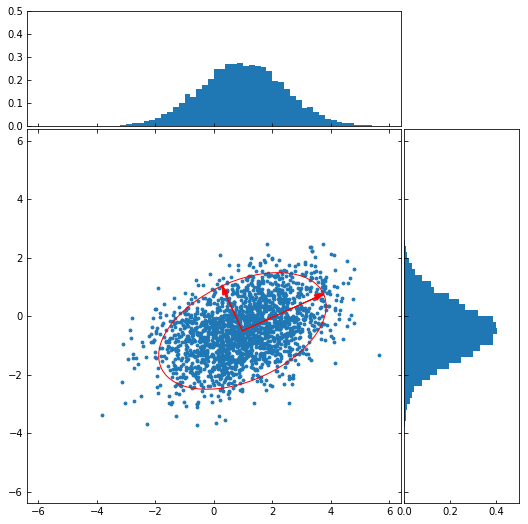

In [21]:
import matplotlib.pyplot as plt

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# scatter plot (subsampled data)
ax_scatter.scatter(x1[::5], x2[::5], s = 8)
# add the ellipse to the scatter plot
confidence_ellipse(x1, x2, ax_scatter, n_std=2.0, edgecolor='red')

# now determine nice limits
binwidth = 0.2
lim = np.ceil(np.abs(X).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x1, bins=bins, density=True)
ax_histy.hist(x2, bins=bins, density=True, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histx.set_ylim(0, .5)
ax_histy.set_ylim(ax_scatter.get_ylim())
ax_histy.set_xlim(0, .5)

plt.show()

The two dimensions of the Gaussian distributed data are plotted against each other in this scatter plot. The projections of this data to each dimension result in the histograms shown as well.

The histogram on top shows the mean value of 1 for the first dimension, the histogram on the right a mean value of -0.5 for the second dimensions. As both histograms are normalised (plotted area is 1) it's immediately obvious that the variance of dimension 1 is greater than that of dimension 2.

The ellipse in the scatter plot visualizes the correlation between both dimensions. Both arrows represent the eigenvectors, that are scaled by (the square root of) their eigenvalues.